<a href="https://colab.research.google.com/github/mhdiham/mhdiham/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Data *Introduction*

1.1 Goal

The aim of this notebook is to examine which customer groups are affected by a high churn rate. The churn rate represents the ratio of lost customers to total customers in a specific period of time.

1.2 Relevance

According to experts, the cost of acquiring new customers is up to five times higher than keeping existing customers. Customer loyalty is therefore a central goal of a sustainable business strategy. An important element of this strategy is the prevention of customer churn. In the digital age, this is more true than ever, as offers can be compared very easily.

In the telecommunication sector customer churn is one of the biggest problems. Vodafone, for example, had a churn rate of 12% in Germany, 24% in Italy, 26% in the UK and even 28% in Spain in the fourth quarter of the 2020/21 financial year (source: https://www.statista.com/statistics/972046/vodafone-churn-rate-european-countries/). It is therefore important for telecommunication companies to analyze relevant customer data (goal of this notebook) and, based on this, develop a robust churn prediction model (goal of following notebook) in order to retain customers and develop strategies to reduce the churn rate.



1.3 Research Question

Which customer groups show an above-average churn rate?

###2. Imports

2.1 Libraries


To analyse the data, we first need to import the required libraries:

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
import warnings

###2.2 Colors

In [ ]:
# definition of colors
custom_colors=['#c14953','#d96548','#f2a553','#f3c969','#98e2c6', '#86c1b2', '#74a09e']
customPalette = sns.set_palette(sns.color_palette(custom_colors))

To analyse the data, we first need to import the required libraries:


###2.3 Data

I created one dataset out of the following single datasets to get additional features (like satisfaction score, total revenues and cltv):

https://www.kaggle.com/blastchar/telco-customer-churn ("../input/d/blastchar/telco-customer-churn/WAFn-UseC-Telco-Customer-Churn.csv../input/d/blastchar/telco-customer-churn/WAFn-UseC-Telco-Customer-Churn.csv") https://www.kaggle.com/ylchang/telco-customer-churn-1113 ("../input/telco-customer-churn-1113../input/telco-customer-churn-1113")

In [ ]:
# load data
df = pd.read_csv("Telco_customer_churn.csv")

We use the head() function to show the first 5 rows:

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Score.1,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Yes,0.0,0,20.94,129.09,1,Churned,86,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Yes,0.0,0,18.24,169.89,2,Churned,67,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,0.0,0,97.20,917.70,3,Churned,86,Other
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,0.0,0,136.92,3182.97,3,Churned,84,Other
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,0.0,0,2172.17,7208.47,1,Churned,89,Competitor


...and the info() function to show data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customerID                         7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   SeniorCitizen                      7043 non-null   int64  
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   tenure                             7043 non-null   int64  
 6   PhoneService                       7043 non-null   object 
 7   MultipleLines                      7043 non-null   object 
 8   InternetService                    7043 non-null   object 
 9   OnlineSecurity                     7043 non-null   object 
 10  OnlineBackup                       7043 non-null   object 
 11  DeviceProtection                   7043 non-null   objec

###3. Data Preparation

3.1 Data types, missing values and data cleaning



Total charges with data type "object" have to be converted into "float" to make calculations later on.

There are eleven customers with missing values for total charges. A closer look at the data reveals that these eleven customers also have a tenure of zero. So, it can be assumed that these are new customers who have not yet incurred any fees. Missing values are therefore imputed with zero.

Satisfaction Score should be a categorical feature (5 categories). So data type "integer" is converted into data type "object".

For senior citizen, which is a categorical feature as well, the values of 0 (=no) and 1 (=yes) are put in inverted commas (str) to convert this feature into data type "object" as well.

In [ ]:
# convert data types and impute missing values with zero
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0).astype("float32")
df["Satisfaction Score"] = df["Satisfaction Score"].astype("object")
df["SeniorCitizen"] = df["SeniorCitizen"].replace(0, "0").replace(1, "1")

Columns which are not needed are removed:

In [ ]:
# remove columns which are not needed
df = df.drop("Churn Score.1", axis=1)
df = df.drop("Churn Score", axis=1)

We use the info() function again to show the remaining variables including their data types:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customerID                         7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   SeniorCitizen                      7043 non-null   object 
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   tenure                             7043 non-null   int64  
 6   PhoneService                       7043 non-null   object 
 7   MultipleLines                      7043 non-null   object 
 8   InternetService                    7043 non-null   object 
 9   OnlineSecurity                     7043 non-null   object 
 10  OnlineBackup                       7043 non-null   object 
 11  DeviceProtection                   7043 non-null   objec

To simplify the code later on, columns/variables are written like this:


In [ ]:
# variable defintions
customer_id = df["customerID"]
gender = df["gender"]
senior_citizen = df["SeniorCitizen"]
partner = df["Partner"]
dependents = df["Dependents"]
tenure = df["tenure"]
phone_service = df["PhoneService"]
multiple_lines = df["MultipleLines"]
internet_service = df["InternetService"]
online_security = df["OnlineSecurity"]
online_backup = df["OnlineBackup"]
device_protection = df["DeviceProtection"]
tech_support = df["TechSupport"]
streaming_tv = df["StreamingTV"]
streaming_movies = df["StreamingMovies"]
contract = df["Contract"]
paperless_billing = df["PaperlessBilling"]
payment_method = df["PaymentMethod"]
monthly_charges = df["MonthlyCharges"]
total_charges = df["TotalCharges"]
churn = df["Churn"] #churn yes/no
churn_rate = df["churn_rate"] #churn 1/0
cltv = df["CLTV"]
churn_reason = df["Churn Reason"]
country = df["Country"]
state = df["State"]
city = df["City"]
zip_code = df["Zip Code"]
lat_long = df["Lat Long"]
latitude = df["Latitude"]
longitude = df["Longitude"]
age = df["Age"]
married = df["Married"]
referred_a_friend = df["Referred a Friend"]
number_of_referrals = df["Number of Referrals"]
offer = df["Offer"]
avg_monthly_long_distance_charges = df["Avg Monthly Long Distance Charges"]
avg_monthly_gb_download = df["Avg Monthly GB Download"]
streaming_music = df["Streaming Music"]
premium_tech_support = df["Premium Tech Support"]
unlimited_data = df["Unlimited Data"]
total_refunds = df["Total Refunds"]
total_extra_data_charges = df["Total Extra Data Charges"]
total_long_distance_charges = df["Total Long Distance Charges"]
total_revenue = df["Total Revenue"]
satisfaction_score = df ["Satisfaction Score"]
customer_status = df["Customer Status"]
churn_category = df["Churn Category"]

###3.2 Split Features

Features are split into numeric and categorical features. Shape and head for numeric resp. categorical features are shown.

In [ ]:
# numeric features
num_features = df[["tenure", "MonthlyCharges", "TotalCharges",
                 "CLTV", "Total Revenue"]]

In [ ]:
num_features.shape

(7043, 5)

In [ ]:
num_features.head()

,tenure,MonthlyCharges,TotalCharges,CLTV,Total Revenue
0,2,53.85,108.150002,3239,129.09
1,2,70.70,151.649994,2701,169.89
2,8,99.65,820.500000,5372,917.70
3,28,104.80,3046.050049,5003,3182.97
4,49,103.70,5036.299805,5340,7208.47


In [ ]:
cat_features = df[["gender", "SeniorCitizen", "Partner", "Dependents",
                   "PhoneService", "MultipleLines", "InternetService",
                   "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                   "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
                   "PaperlessBilling", "PaymentMethod","Satisfaction Score"]]

In [ ]:
cat_features.shape

(7043, 17)

In [ ]:
cat_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Satisfaction Score
0,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
1,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2
2,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3
3,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3
4,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1


To suppress warnings we run the following code:

In [ ]:
warnings.filterwarnings("ignore")

### 3. Outlier Dectection

There are different statistical methods for identifying outliers. The IQR rule is used here. The IQR (Inter Quartile Range) is defined as the difference between the upper (Q3) and the lower quartile (Q1). With this common rule, a value is treated as an outlier if it falls more than 1.5 IQR above the upper quartile (Q3) or below the lower quartile (Q1). Lower outliers are also below Q1-1.5 IQR, upper outliers above Q3 + 1.5 * IQR. With box plots outlier can be displayed graphically.

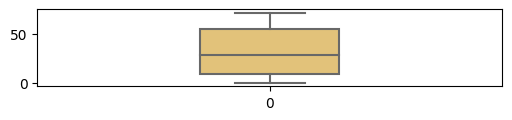

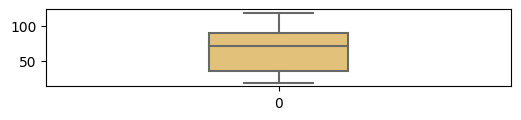

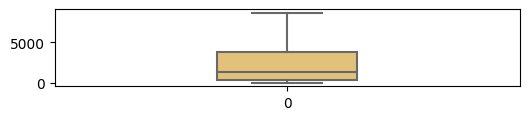

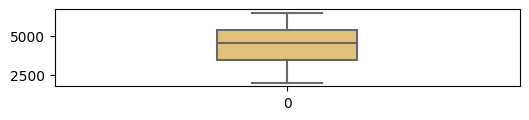

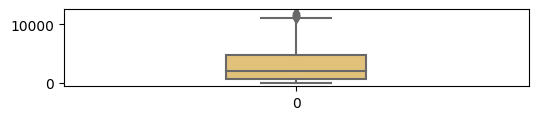

In [ ]:
# outlier detection
def boxplot(num_features):
    plt.figure(figsize=(6,1))
    ax = sns.boxplot(num_features, width=0.3, whis=1.5, color="#f3c969")
    ax.xaxis.labelpad=10
boxplot(tenure)
boxplot(monthly_charges)
boxplot(total_charges)
boxplot(cltv)
boxplot(total_revenue) # contains outliers --> use Standard Scaler

We can notice that for the feature "total revenue" there are 20 values lying outside the fences (i.e. Q3 + 1.5 * IQR). Even if these outliers are not extreme we have to be careful later on when conducting the churn prediction models (not part of this notebook). When it comes to feature engineering we have to use the StandardScaler, which (in contrast to the MinMaxScaler) can handle outliers well.

###4. EDA

###4.1 Target Variable

What is the overall churn rate?

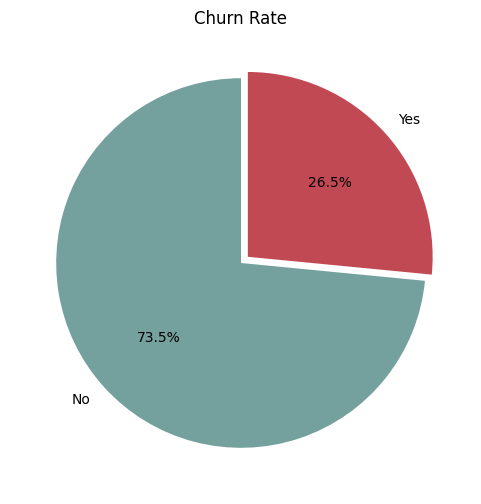

In [ ]:
# target variable - churn rate
plt.figure(figsize=(6,6))
plt.pie(df["Churn"].value_counts(),shadow=False,startangle=90,
        labels=df["Churn"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('Churn Rate')
plt.show()

The overall churn rate is 26.5%.

So let's look at different customer groups. Which groups have a higher probability to churn?

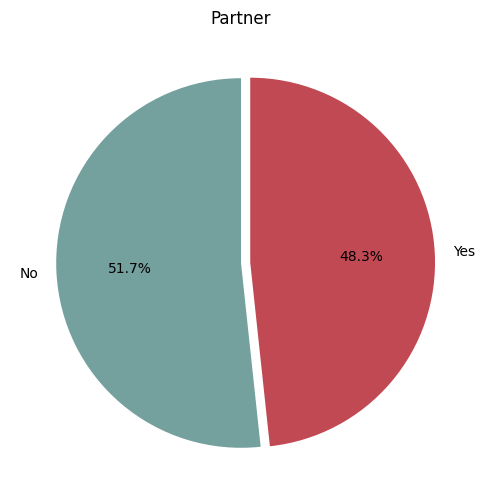

In [ ]:
# target variable - Partner
plt.figure(figsize=(6,6))
plt.pie(df["Partner"].value_counts(),shadow=False,startangle=90,
        labels=df["Partner"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('Partner')
plt.show()

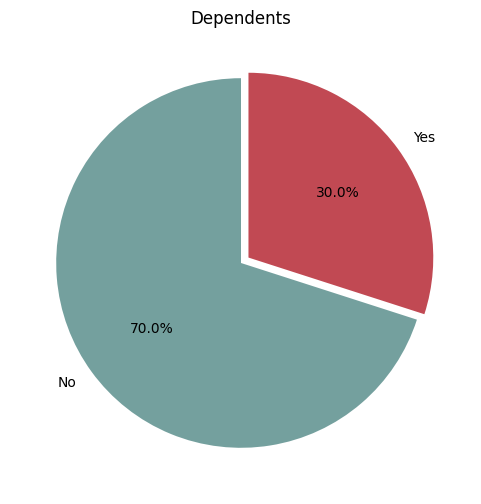

In [ ]:
# target variable - Dependents
plt.figure(figsize=(6,6))
plt.pie(df["Dependents"].value_counts(),shadow=False,startangle=90,
        labels=df["Dependents"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('Dependents')
plt.show()

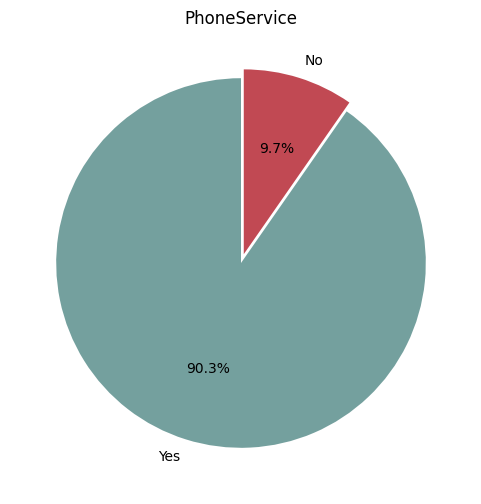

In [ ]:
# target variable - PhoneService
plt.figure(figsize=(6,6))
plt.pie(df["PhoneService"].value_counts(),shadow=False,startangle=90,
        labels=df["PhoneService"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('PhoneService')
plt.show()

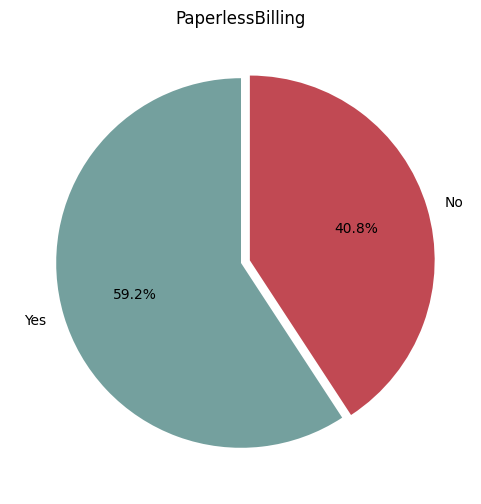

In [ ]:
# target variable - PaperlessBilling
plt.figure(figsize=(6,6))
plt.pie(df["PaperlessBilling"].value_counts(),shadow=False,startangle=90,
        labels=df["PaperlessBilling"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('PaperlessBilling')
plt.show()

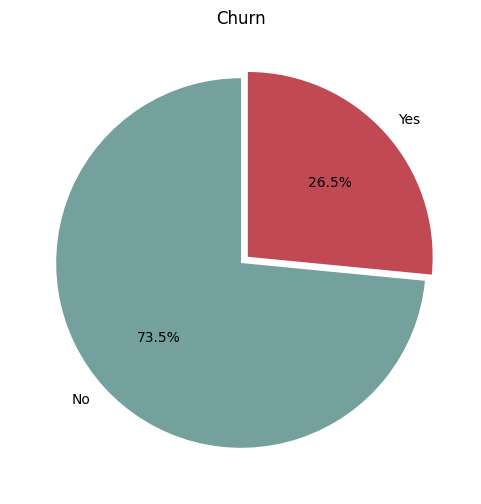

In [ ]:
# target variable - Churn
plt.figure(figsize=(6,6))
plt.pie(df["Churn"].value_counts(),shadow=False,startangle=90,
        labels=df["Churn"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('Churn')
plt.show()

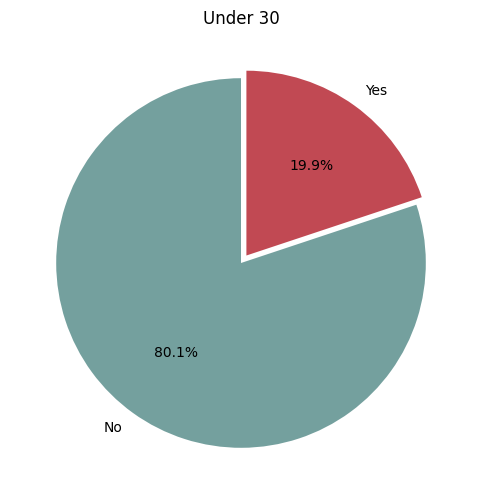

In [ ]:
# target variable - Churn
plt.figure(figsize=(6,6))
plt.pie(df["Under 30"].value_counts(),shadow=False,startangle=90,
        labels=df["Under 30"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('Under 30')
plt.show()

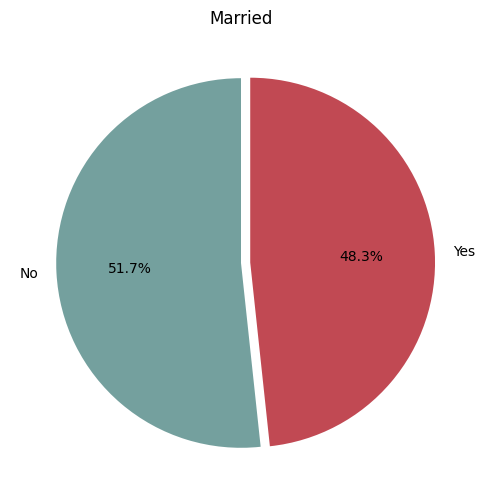

In [ ]:
# target variable - Married
plt.figure(figsize=(6,6))
plt.pie(df["Married"].value_counts(),shadow=False,startangle=90,
        labels=df["Married"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('Married')
plt.show()

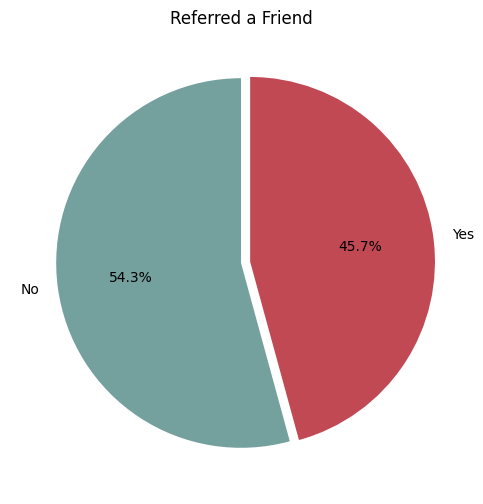

In [ ]:
# target variable - Referred a Friend
plt.figure(figsize=(6,6))
plt.pie(df["Referred a Friend"].value_counts(),shadow=False,startangle=90,
        labels=df["Referred a Friend"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('Referred a Friend')
plt.show()

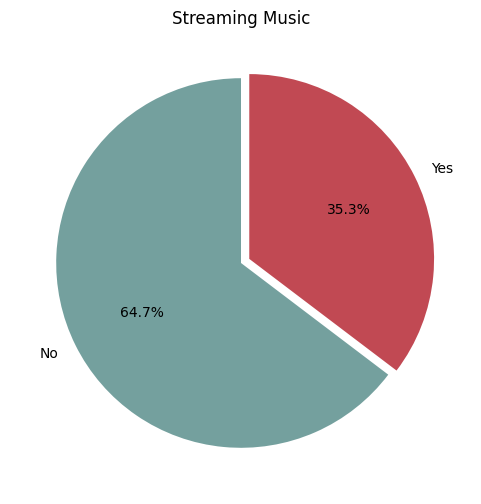

In [ ]:
# target variable - Streaming Music
plt.figure(figsize=(6,6))
plt.pie(df["Streaming Music"].value_counts(),shadow=False,startangle=90,
        labels=df["Streaming Music"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('Streaming Music')
plt.show()

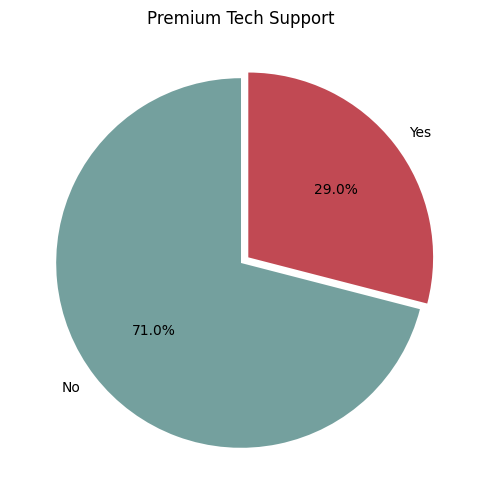

In [ ]:
# target variable - Premium Tech Support
plt.figure(figsize=(6,6))
plt.pie(df["Premium Tech Support"].value_counts(),shadow=False,startangle=90,
        labels=df["Premium Tech Support"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('Premium Tech Support')
plt.show()

###4.2 Numeric Features

For the numeric features kernel density estimate (KDE) functions are caluclated and plotted.

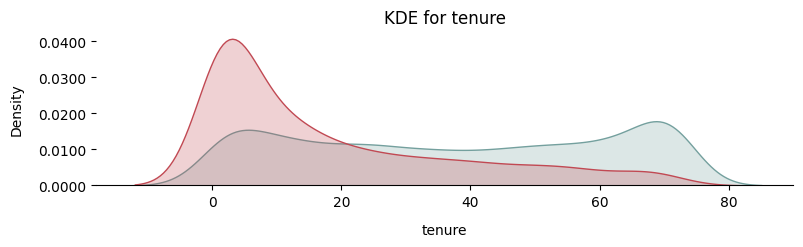

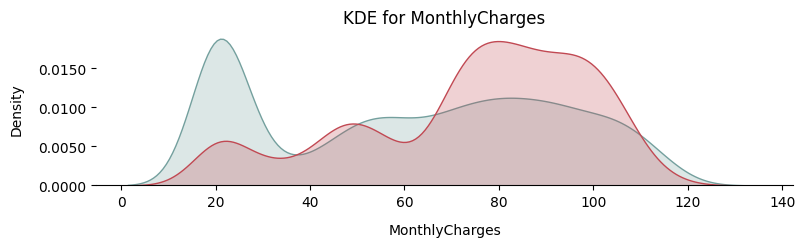

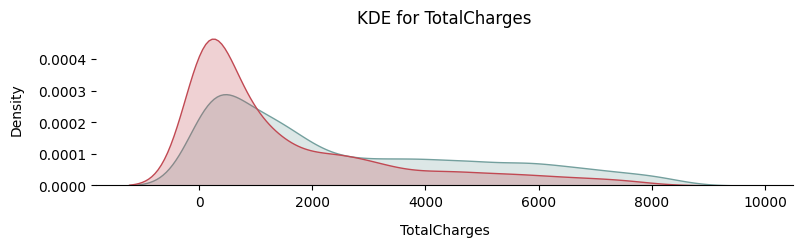

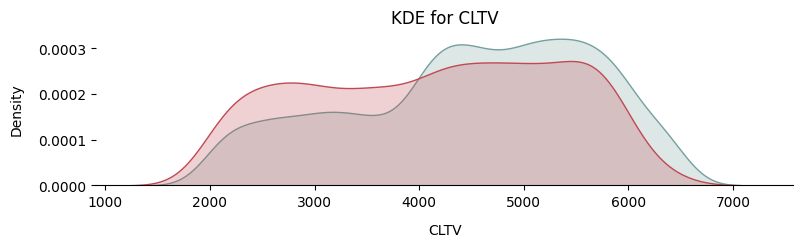

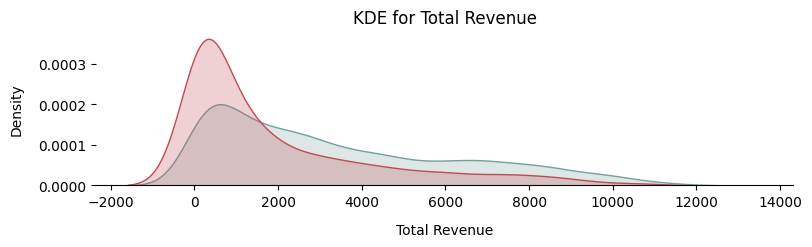

In [ ]:
# KDEplots for numeric features
def kdeplot(feature):
    plt.figure(figsize=(9,2))
    plt.title("KDE for {}".format(feature))
    # plt.tight_layout(pad=1.2)
    ax_kde = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= '#74a09e', label= 'Churn: No', shade='True')
    ax_kde = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= "#c14953", label= 'Churn: Yes', shade='True')
    ax_kde.yaxis.labelpad=10
    ax_kde.xaxis.labelpad=10
    ax_kde.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.4f}'))
    sns.despine(left="True")
kdeplot("tenure")
kdeplot("MonthlyCharges")
kdeplot ("TotalCharges")
kdeplot("CLTV")
kdeplot("Total Revenue")


The following conclusions can be drawn:

New customers with a short tenure are more likely to switch.
Customers who pay higher monthly fees are also more likely to churn.

### 4.3 Categorical Features

For the categorical features barplots show the differences between target groups.

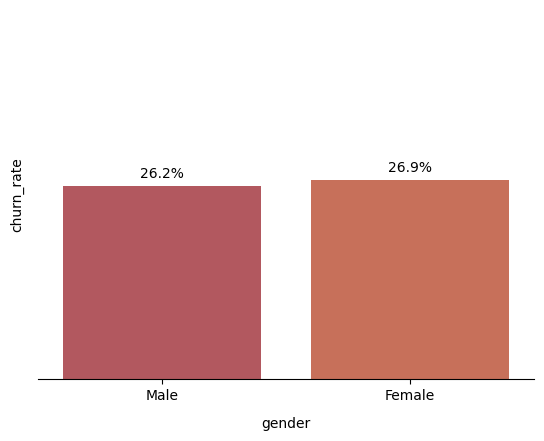

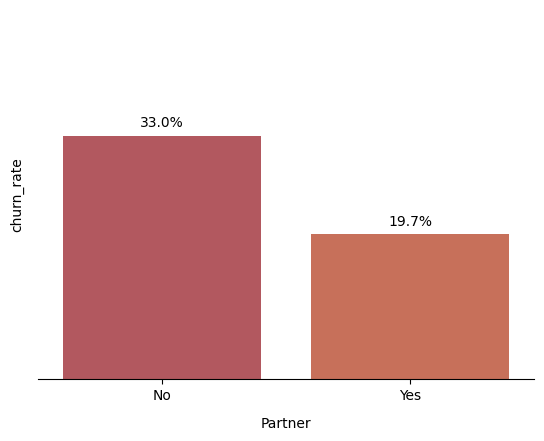

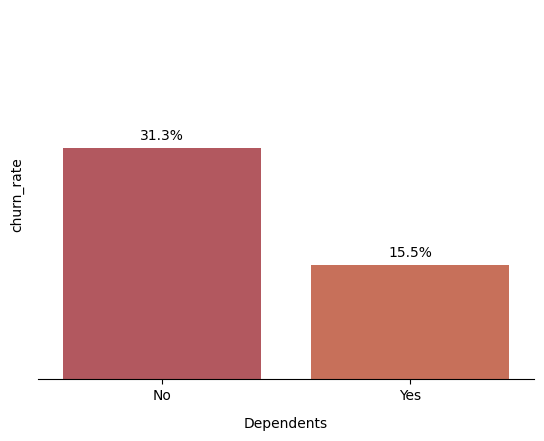

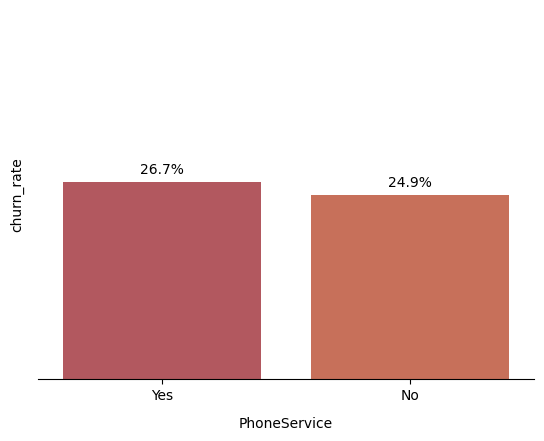

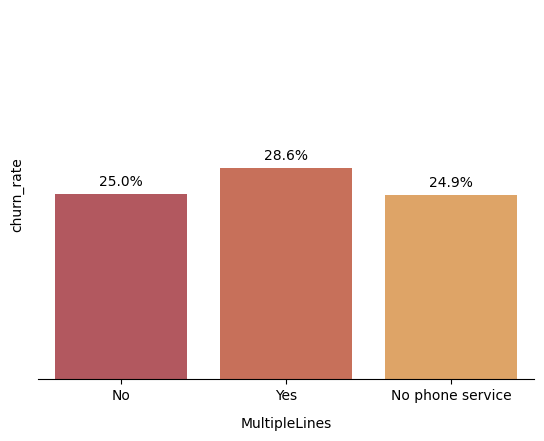

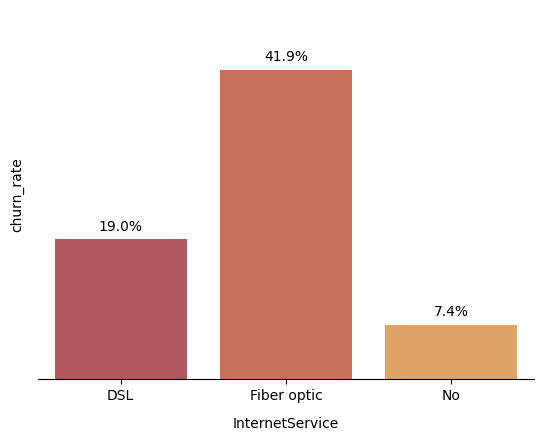

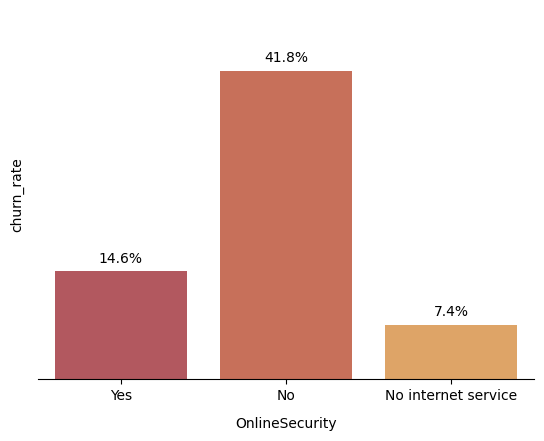

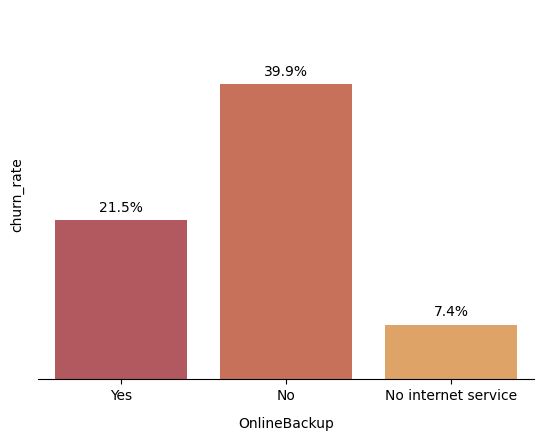

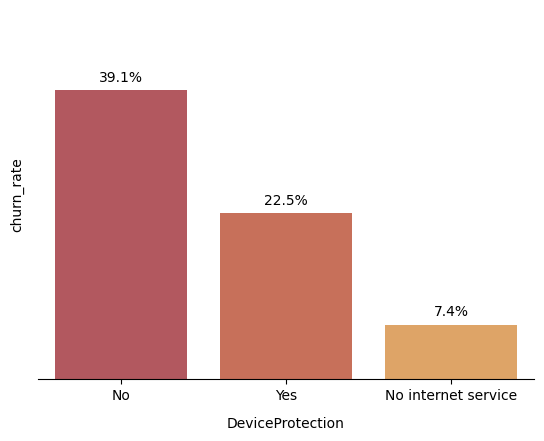

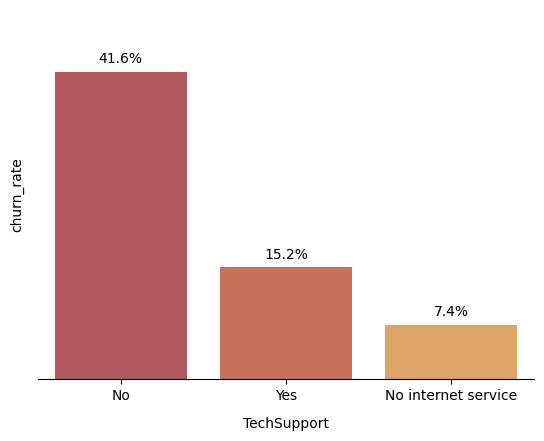

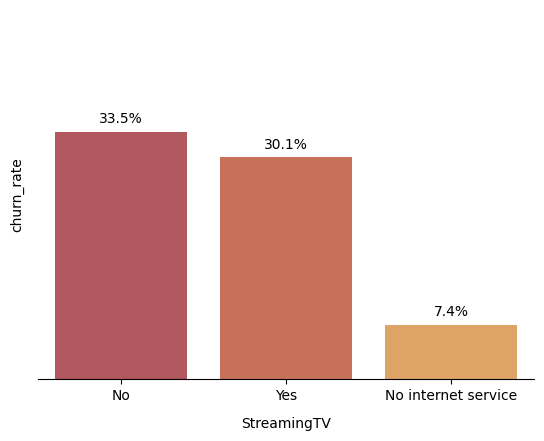

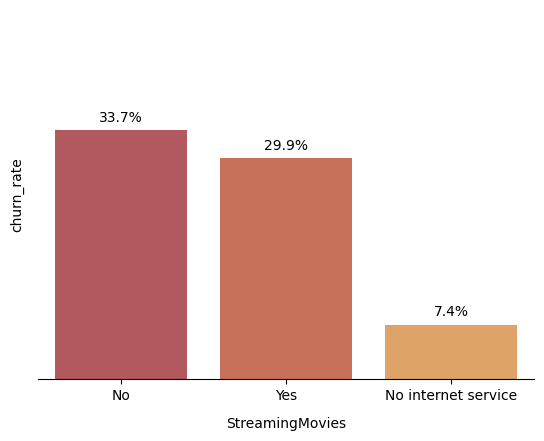

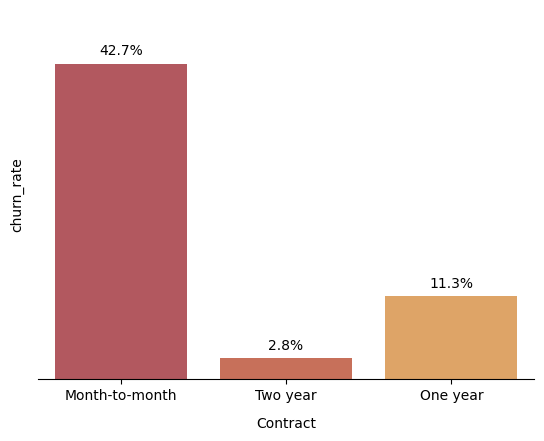

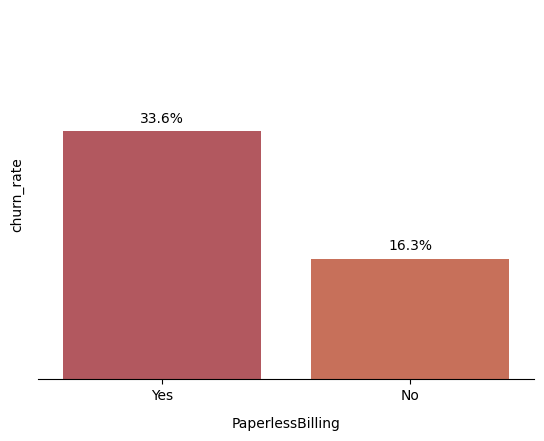

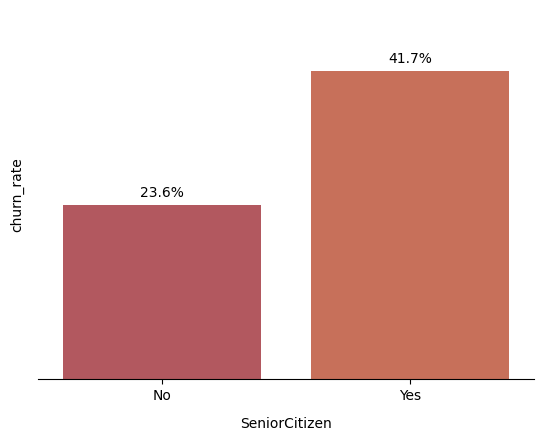

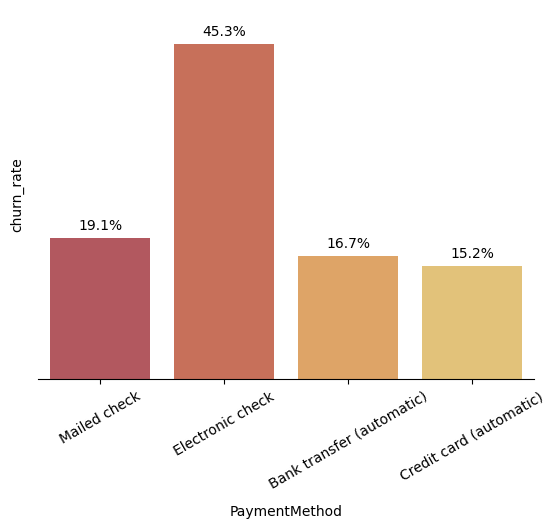

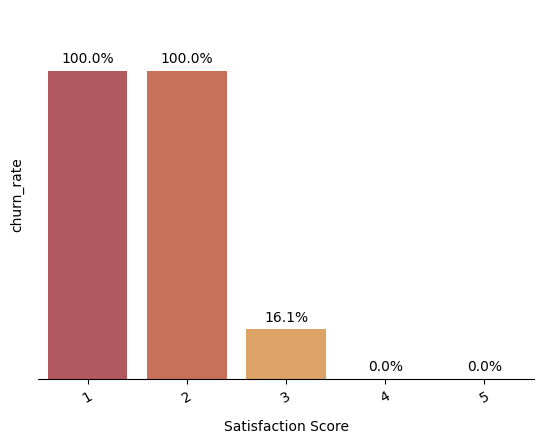

In [ ]:
# barplots for categorical features

def barplot(feature):
    plt.figure()
    ax_bar = sns.barplot(x=feature, y="churn_rate", data=df, ci=0,
                         palette=customPalette, saturation=0.75)
    for p in ax_bar.patches:
        ax_bar.annotate(format(p.get_height(), '.1%'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
    ax_bar.yaxis.labelpad=10
    ax_bar.xaxis.labelpad=10
    sns.despine(left="True")
    ax_bar.set_ylim(0, 0.50)
    ax_bar.set_yticklabels(['{:,.0%}'.format(x) for x in ax_bar.get_yticks()])
    ax_bar.yaxis.set_ticks([])
barplot("gender")
barplot("Partner")
barplot("Dependents")
barplot("PhoneService")
barplot("MultipleLines")
barplot("InternetService")
barplot("OnlineSecurity")
barplot("OnlineBackup")
barplot("DeviceProtection")
barplot("TechSupport")
barplot("StreamingTV")
barplot("StreamingMovies")
barplot("Contract")
barplot("PaperlessBilling")

# senior citizen
def barplot(feature):
    plt.figure()
    ax_bar = sns.barplot(x=feature, y="churn_rate", data=df, ci=0,
                         palette=customPalette, saturation=0.75)
    for p in ax_bar.patches:
        ax_bar.annotate(format(p.get_height(), '.1%'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
    ax_bar.yaxis.labelpad=10
    ax_bar.xaxis.labelpad=10
    ax_bar.set_xticklabels(["No","Yes"])
    sns.despine(left="True")
    ax_bar.set_ylim(0, 0.50)
    ax_bar.set_yticklabels(['{:,.0%}'.format(x) for x in ax_bar.get_yticks()])
    ax_bar.yaxis.set_ticks([])
barplot("SeniorCitizen")

# payment method
def barplot(feature):
    plt.figure()
    ax_bar = sns.barplot(x=feature, y="churn_rate", data=df, ci=0,
                         palette=customPalette, saturation=0.75)
    for p in ax_bar.patches:
        ax_bar.annotate(format(p.get_height(), '.1%'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
    ax_bar.yaxis.labelpad=10
    ax_bar.xaxis.labelpad=10
    sns.despine(left="True")
    ax_bar.set_ylim(0, 0.50)
    ax_bar.set_yticklabels(['{:,.0%}'.format(x) for x in ax_bar.get_yticks()])
    ax_bar.yaxis.set_ticks([])
    ax_bar.set_xticklabels(ax_bar.get_xticklabels(),rotation=30)
barplot("PaymentMethod")


# satisfaction score
def barplot(feature):
    plt.figure()
    ax_bar = sns.barplot(x=feature, y="churn_rate", data=df, ci=0,
                         palette=customPalette, saturation=0.75)
    for p in ax_bar.patches:
        ax_bar.annotate(format(p.get_height(), '.1%'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
    ax_bar.yaxis.labelpad=10
    ax_bar.xaxis.labelpad=10
    sns.despine(left="True")
    ax_bar.set_ylim(0, 1.2)
    ax_bar.set_yticklabels(['{:,.0%}'.format(x) for x in ax_bar.get_yticks()])
    ax_bar.yaxis.set_ticks([])
    ax_bar.set_xticklabels(ax_bar.get_xticklabels(),rotation=30)
barplot("Satisfaction Score")

The following customer groups have a probability to churn:

customers without partners and customers without family members as well as senior citizens
customers with fiber optic use
customers with short term contracts (month-to-month)
customers with paperless invoices
customers who pay by electronic check
customers with low satisfaction score (1,2)
On the contrary, customers with additional security services or additional technical support are less likely to churn.

### 5. Plot

5.1 Import Libary Yang di butuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

5.2 Load data dari file CSV

In [ ]:
df = pd.read_csv("Telco_customer_churn.csv")

5.3 Plot histogram untuk variabel months

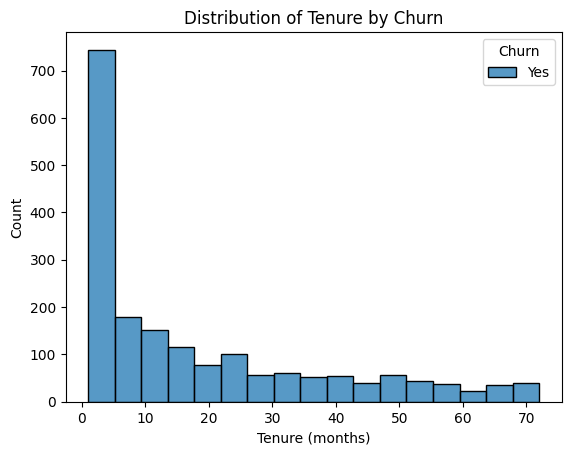

In [ ]:
sns.histplot(df, x='tenure', hue='Churn', multiple='stack')
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

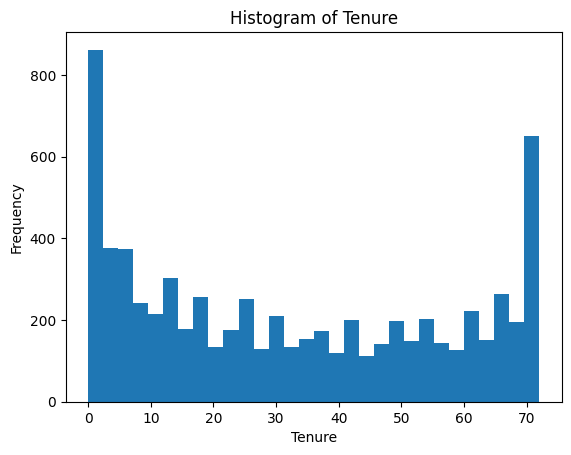

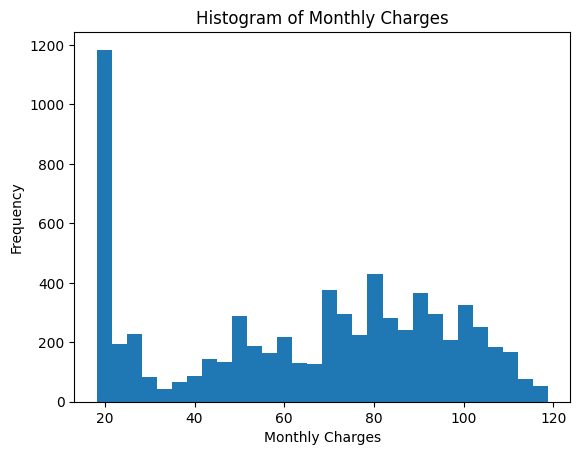

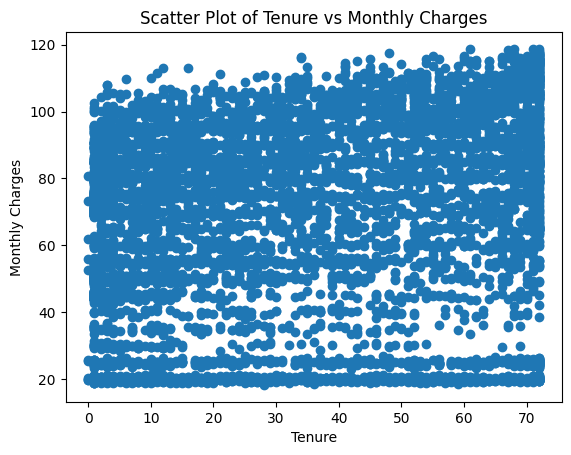

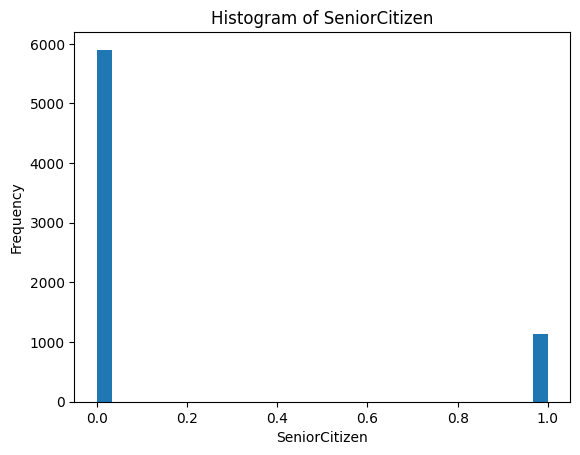

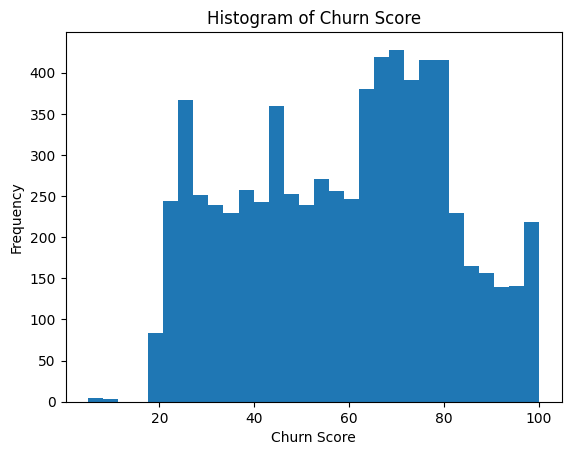

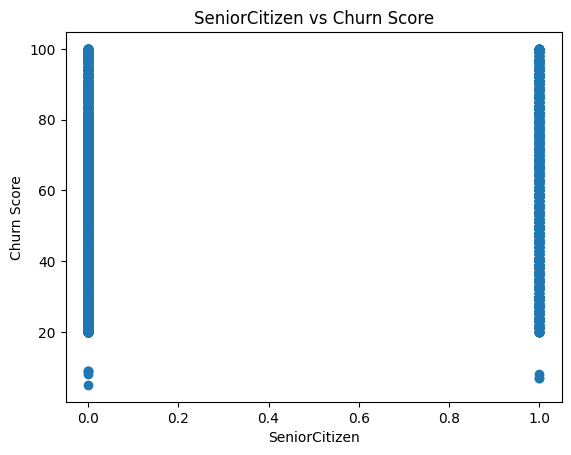

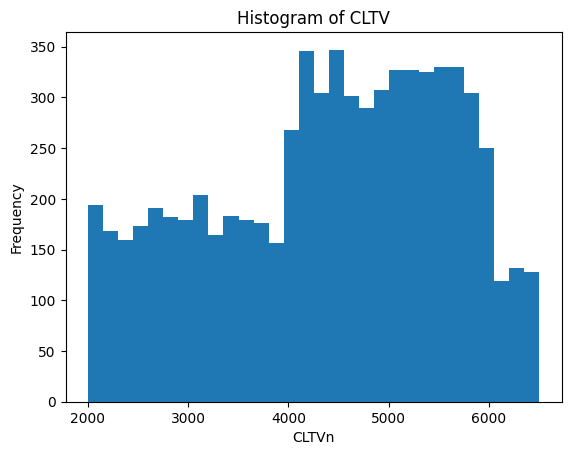

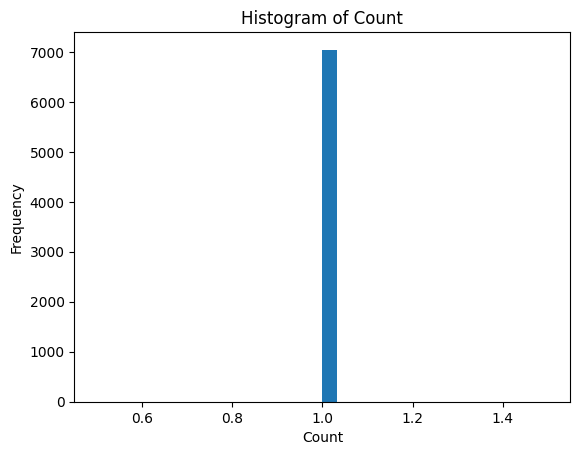

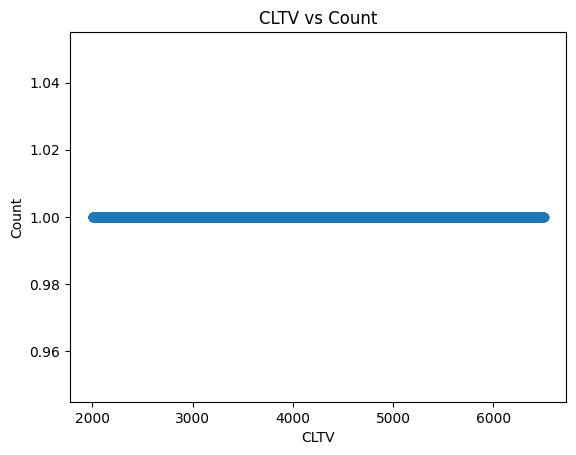

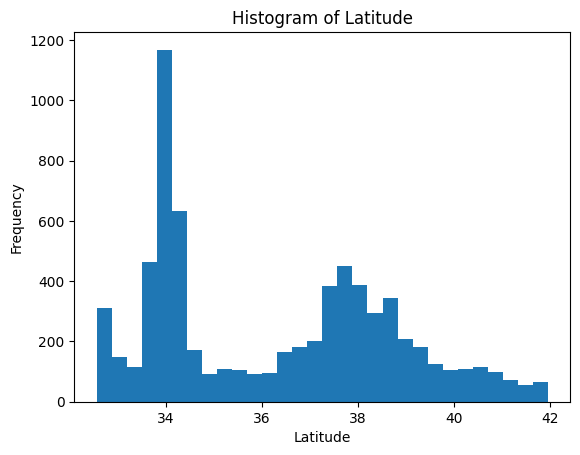

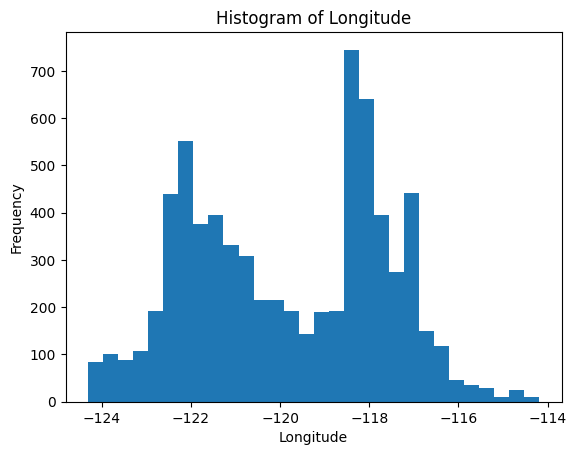

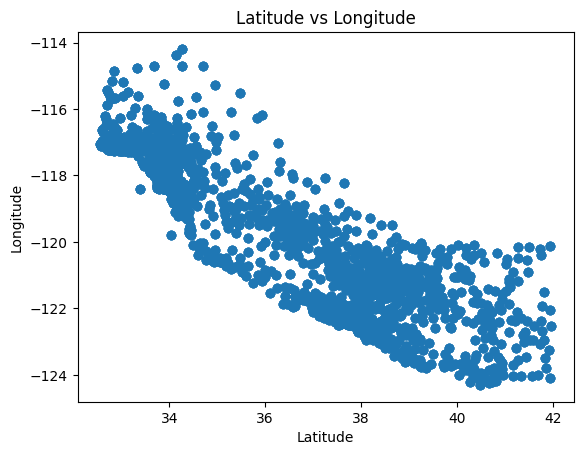

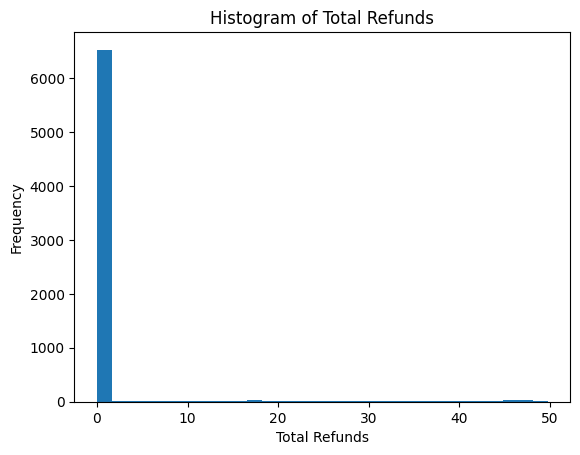

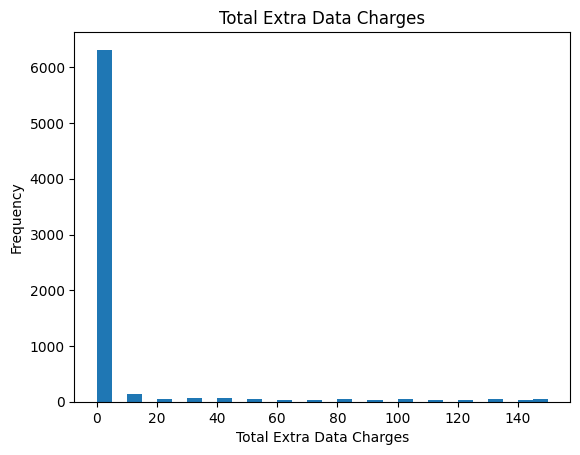

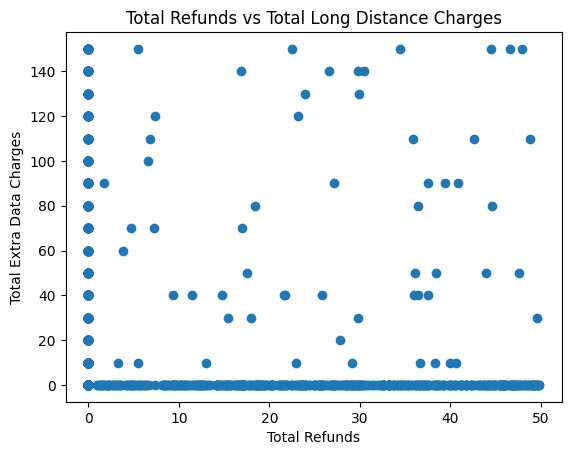

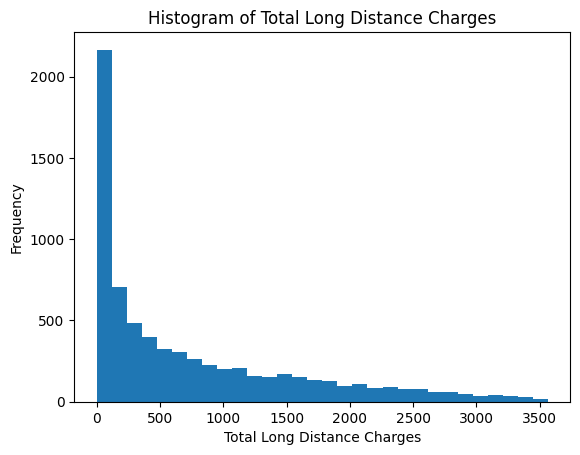

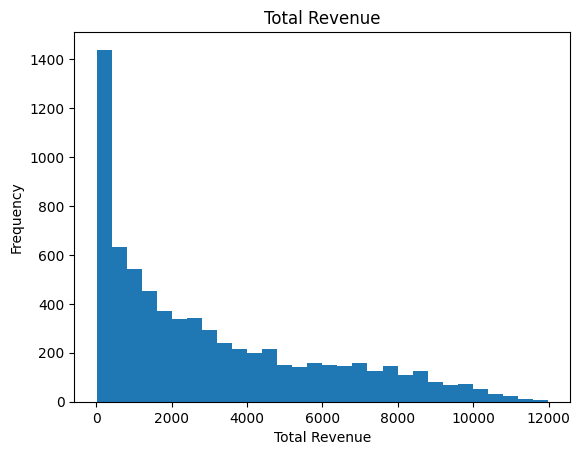

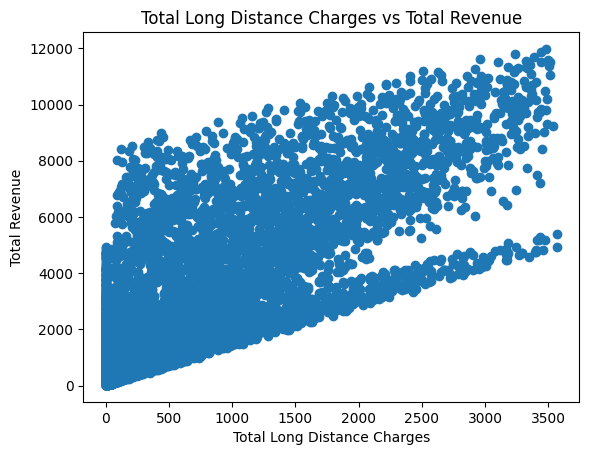

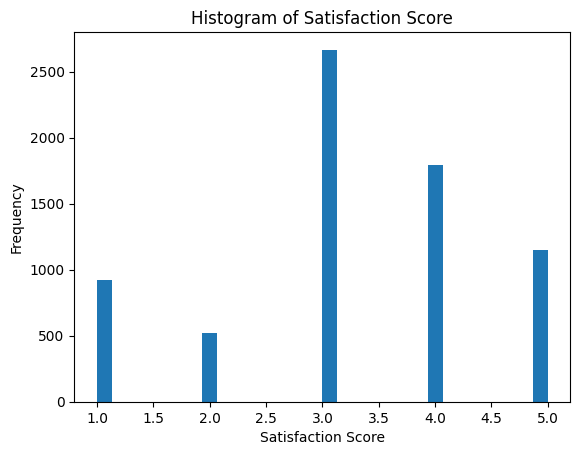

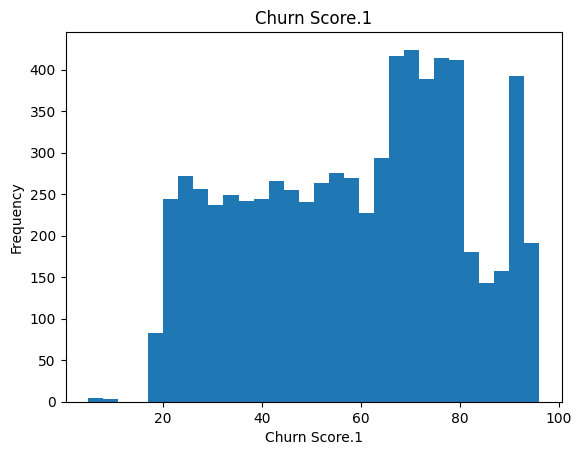

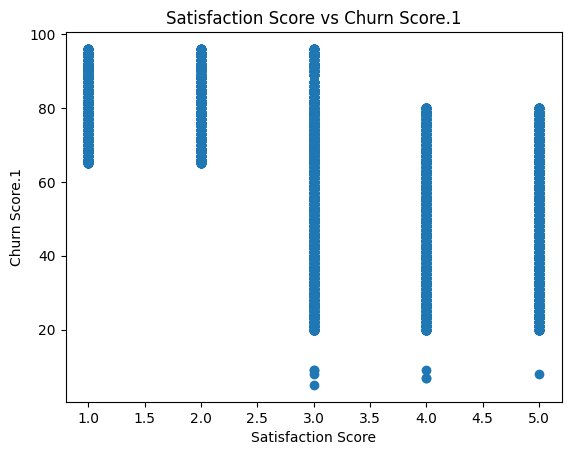

In [2]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/Telco_customer_churn.csv')

# Plot histogram untuk kolom tenure
plt.hist(df['tenure'], bins=30)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')
plt.show()

# Plot histogram untuk kolom MonthlyCharges
plt.hist(df['MonthlyCharges'], bins=30)
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Charges')
plt.show()

# Plot scatter plot untuk korelasi antara tenure dan MonthlyCharges
plt.scatter(df['tenure'], df['MonthlyCharges'])
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Scatter Plot of Tenure vs Monthly Charges')
plt.show()


# Plot histogram untuk kolom SeniorCitizen
plt.hist(df['SeniorCitizen'], bins=30)
plt.xlabel('SeniorCitizen')
plt.ylabel('Frequency')
plt.title('Histogram of SeniorCitizen')
plt.show()

# Plot histogram untuk kolom Churn Score
plt.hist(df['Churn Score'], bins=30)
plt.xlabel('Churn Score')
plt.ylabel('Frequency')
plt.title('Histogram of Churn Score')
plt.show()
# Plot scatter plot untuk korelasi antara SeniorCitizen dan Churn Score
plt.scatter(df['SeniorCitizen'], df['Churn Score'])
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn Score')
plt.title('SeniorCitizen vs Churn Score')
plt.show()

# Plot histogram untuk kolom CLTV
plt.hist(df['CLTV'], bins=30)
plt.xlabel('CLTVn')
plt.ylabel('Frequency')
plt.title('Histogram of CLTV')
plt.show()

# Plot histogram untuk kolom Count
plt.hist(df['Count'], bins=30)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Count')
plt.show()

# Plot scatter plot untuk korelasi antara CLTV dan Count
plt.scatter(df['CLTV'], df['Count'])
plt.xlabel('CLTV')
plt.ylabel('Count')
plt.title('CLTV vs Count')
plt.show()

# Plot histogram untuk kolom Latitude
plt.hist(df['Latitude'], bins=30)
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Latitude')
plt.show()

# Plot histogram untuk kolom Longitude
plt.hist(df['Longitude'], bins=30)
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Longitude')
plt.show()
# Plot scatter plot untuk korelasi antara Latitude' dan Longitude
plt.scatter(df['Latitude'], df['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude vs Longitude')
plt.show()

# Plot histogram untuk kolom Total Refunds
plt.hist(df['Total Refunds'], bins=30)
plt.xlabel('Total Refunds')
plt.ylabel('Frequency')
plt.title('Histogram of Total Refunds')
plt.show()

# Plot histogram untuk kolom Total Extra Data Charges
plt.hist(df['Total Extra Data Charges'], bins=30)
plt.xlabel('Total Extra Data Charges')
plt.ylabel('Frequency')
plt.title('Total Extra Data Charges')
plt.show()

# Plot scatter plot untuk korelasi antara Total Refunds dan Total Long Distance Charges
plt.scatter(df['Total Refunds'], df['Total Extra Data Charges'])
plt.xlabel('Total Refunds')
plt.ylabel('Total Extra Data Charges')
plt.title('Total Refunds vs Total Long Distance Charges' )
plt.show()

# Plot histogram untuk kolom Total Long Distance Charges
plt.hist(df['Total Long Distance Charges'], bins=30)
plt.xlabel('Total Long Distance Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Total Long Distance Charges')
plt.show()

# Plot histogram untuk kolom Total Revenue
plt.hist(df['Total Revenue'], bins=30)
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.title('Total Revenue')
plt.show()

# Plot scatter plot untuk korelasi antara otal Long Distance Charges dan Total Revenue
plt.scatter(df['Total Long Distance Charges'], df['Total Revenue'])
plt.xlabel('Total Long Distance Charges')
plt.ylabel('Total Revenue')
plt.title('Total Long Distance Charges vs Total Revenue' )
plt.show()

# Plot histogram untuk kolom Satisfaction Score
plt.hist(df['Satisfaction Score'], bins=30)
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Histogram of Satisfaction Score')
plt.show()

# Plot histogram untuk kolom Churn Score.1
plt.hist(df['Churn Score.1'], bins=30)
plt.xlabel('Churn Score.1')
plt.ylabel('Frequency')
plt.title('Churn Score.1')
plt.show()


# Plot scatter plot untuk korelasi antara Satisfaction Score dan Churn Score.1
plt.scatter(df['Satisfaction Score'], df['Churn Score.1'])
plt.xlabel('Satisfaction Score')
plt.ylabel('Churn Score.1')
plt.title('Satisfaction Score vs Churn Score.1' )
plt.show()

<ipython-input-70-ef2bfac6ab04>:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[num_cols].corr()


<Axes: >

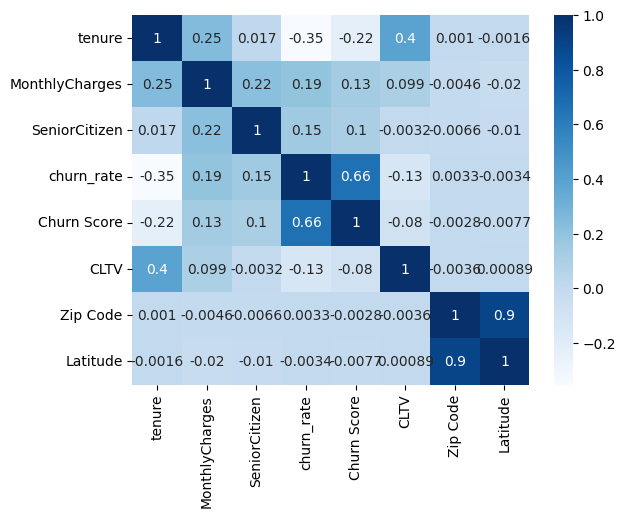

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset
df = pd.read_csv('/content/Telco_customer_churn.csv')

# Checking the first 5 rows of the dataset
df.head()

# Checking the shape of the dataset
df.shape

# Checking the data types of the columns
df.dtypes

# Checking the missing values in the dataset
df.isnull().sum()

# Checking the unique values in the dataset
df.nunique()

# Checking the distribution of the target variable
sns.countplot(x='Churn', data=df)

# Checking the correlation between the numerical variables
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'churn_rate', 'Churn Score', 'CLTV', 'Zip Code','Latitude']

corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')


<Axes: >

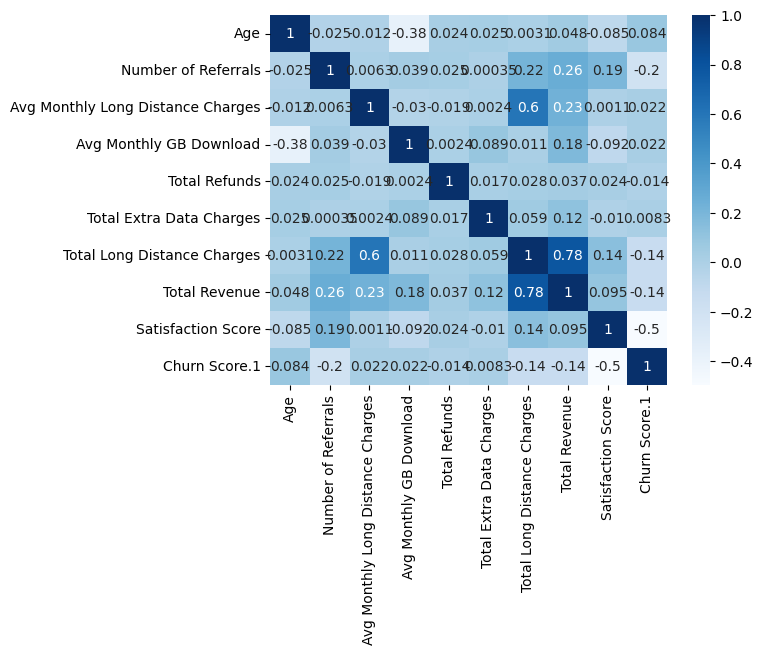

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset
df = pd.read_csv('/content/Telco_customer_churn.csv')

# Checking the first 5 rows of the dataset
df.head()

# Checking the shape of the dataset
df.shape

# Checking the data types of the columns
df.dtypes

# Checking the missing values in the dataset
df.isnull().sum()

# Checking the unique values in the dataset
df.nunique()

# Checking the distribution of the target variable
sns.countplot(x='Churn', data=df)

# Checking the correlation between the numerical variables
num_cols = ['Age', 'Number of Referrals', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue','Satisfaction Score','Churn Score.1']

corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

